Dependecies: Add your Dependencies here

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']= 10,10

In [2]:
df = pd.read_csv("credit_scoring_sample.csv")
df.head()

,Serious_Dlq_in_2yrs,Debt_Ratio,age,Number_Of_Time_30-59_Days_Past_Due,Number_Of_Time_60-89_Days_Past_Due,Number_Of_Times_90_Days_Late,Monthly_Income,Dependents
0,0,454.000000,21,0,0,0,NaN,NaN
1,1,0.174377,22,1,1,1,280.0,0.0
2,0,0.000000,22,0,0,0,1500.0,0.0
3,1,0.000000,23,98,98,98,NaN,0.0
4,1,111.000000,23,0,1,2,NaN,0.0


Read the dataset from the CSV file

In [3]:
dic = {'Serious_Dlq_in_2yrs':0,'Debt_Ratio':0.24,'age':23,'Number_Of_Time_30-59_Days_Past_Due':0,'Number_Of_Time_60-89_Days_Past_Due':0,'Number_Of_Times_90_Days_Late':0,'Monthly_Income':78,'Dependents':0}
data = pd.DataFrame(dic,index=[0])
data

,Serious_Dlq_in_2yrs,Debt_Ratio,age,Number_Of_Time_30-59_Days_Past_Due,Number_Of_Time_60-89_Days_Past_Due,Number_Of_Times_90_Days_Late,Monthly_Income,Dependents
0,0,0.24,23,0,0,0,78,0


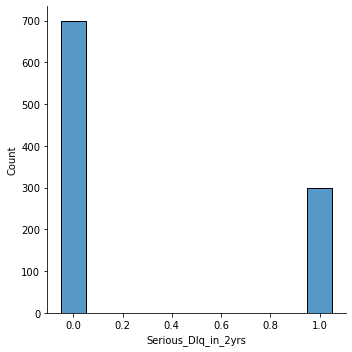

In [4]:
# Plot Distrubution of the target variable
sns.displot(df, x="Serious_Dlq_in_2yrs",discrete=True,shrink = 0.1)

In [5]:
# Handle the NaN values
df["Monthly_Income"].fillna(df["Monthly_Income"].mean(), inplace=True)
df.dropna(subset=["Dependents"], inplace=True)
# df["Dependents"].fillna(df["Dependents"].mean(), inplace=True)
df.head(20)

,Serious_Dlq_in_2yrs,Debt_Ratio,age,Number_Of_Time_30-59_Days_Past_Due,Number_Of_Time_60-89_Days_Past_Due,Number_Of_Times_90_Days_Late,Monthly_Income,Dependents
1,1,0.174377,22,1,1,1,280.000000,0.0
2,0,0.000000,22,0,0,0,1500.000000,0.0
3,1,0.000000,23,98,98,98,6182.567036,0.0
4,1,111.000000,23,0,1,2,6182.567036,0.0
5,1,0.021140,23,0,1,1,1560.000000,0.0
6,1,0.074324,23,1,0,0,1923.000000,0.0
7,0,0.068966,23,1,0,0,2000.000000,0.0
9,0,0.000000,23,0,0,0,820.000000,0.0
10,1,0.048207,24,0,0,0,1700.000000,0.0
11,1,0.227775,24,1,1,0,1900.000000,0.0


array([[<AxesSubplot:title={'center':'Debt_Ratio'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Number_Of_Time_30-59_Days_Past_Due'}>],
       [<AxesSubplot:title={'center':'Number_Of_Time_60-89_Days_Past_Due'}>,
        <AxesSubplot:title={'center':'Number_Of_Times_90_Days_Late'}>,
        <AxesSubplot:title={'center':'Monthly_Income'}>],
       [<AxesSubplot:title={'center':'Dependents'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

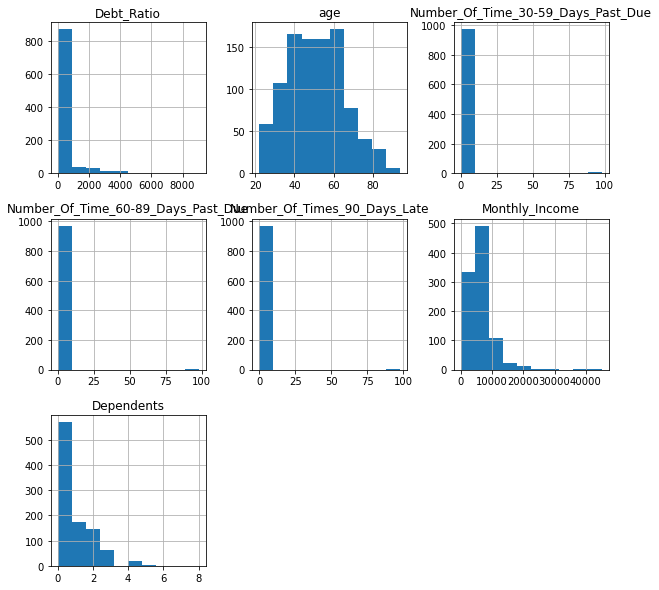

In [6]:
# Visualize the distribution of data for every feature
X = df.drop("Serious_Dlq_in_2yrs", axis=1)
X.hist()

Train the Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, train_test_split

In [8]:
# seperate depedendent and independent variables from the dataset
X = df.drop("Serious_Dlq_in_2yrs", axis=1)
y = df["Serious_Dlq_in_2yrs"]

In [9]:
# define paramerts for the random forest
parameters = {'max_features': [1, 2, 4], 'min_samples_leaf': [3, 5, 7, 9], 'max_depth': [5,10,15]}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf = RandomForestClassifier(n_estimators=100, max_features = 2, max_depth = 5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=2)

In [10]:
# perform cross validation
from sklearn.model_selection import cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cross_val_score(rf, X, y, cv=5)

array([0.32653061, 0.8       , 0.77948718, 0.76410256, 0.75897436])

In [11]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

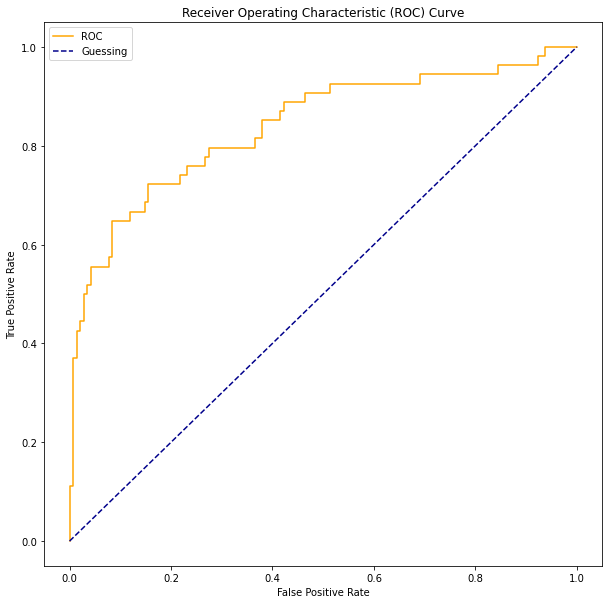

In [12]:
y_probs = rf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plot_roc_curve(fpr, tpr)

In [13]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs)

0.8390714658320293

In [14]:
# perform grid search
grid_search = GridSearchCV(rf, parameters, n_jobs=-1, scoring='roc_auc', cv=skf)
grid_search.fit(X_train, y_train);

In [15]:
#Get the best score from the grid search
grid_search.best_params_

{'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 9}

In [16]:
# Find the feature which has the weakest impact in Random Forest Model
rf.feature_importances_

array([0.07601762, 0.11253915, 0.21682776, 0.16243615, 0.29916246,
       0.11357711, 0.01943975])

In [17]:
print("Feature with weakest impact in Random Forest Model is Dependents")

Feature with weakest impact in Random Forest Model is Dependents


In [18]:
# Perform bagging classification using decision trees as the base classifier

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold


In [20]:
# get a list of models to evaluate
def get_models():
    model = BaggingClassifier()
    return model

In [21]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [22]:
# Summarize the performance by getting mean and standard deviation of scores
model = get_models()
scores = evaluate_model(model,X,y)
print('Mean: %.3f, Standard Deviation: %.3f' % (mean(scores), std(scores)))

Mean: 0.772, Standard Deviation: 0.041


<AxesSubplot:xlabel='Serious_Dlq_in_2yrs', ylabel='Number_Of_Time_30-59_Days_Past_Due'>

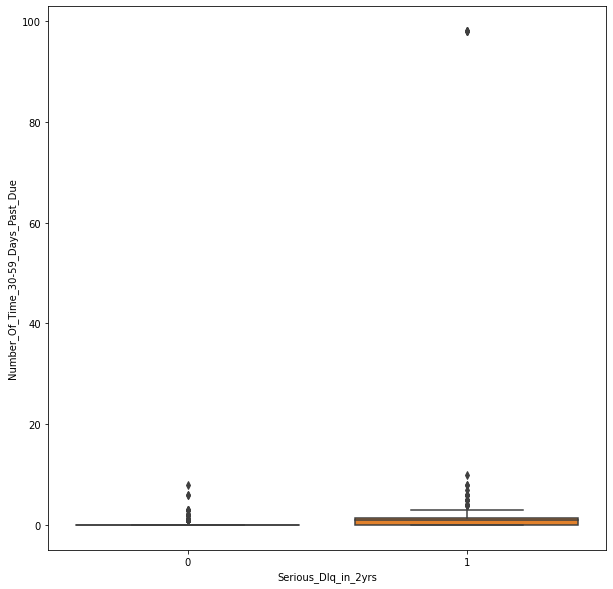

In [23]:
# Plot the model performance for comparison using boxplot
# df.boxplot(by ='', column =[''], grid = False)
sns.boxplot(x = 'Serious_Dlq_in_2yrs', y = 'Number_Of_Time_30-59_Days_Past_Due', data = df)